# Paddle Quantum 入门手册

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## <a name="Overview">总览</a>

这是一份简洁、实用的关于量子机器学习（Quantum Machine Learnig，QML）的介绍，面向读者包括但不限于物理、数学和计算机背景。本手册主要采用 Jupyter Notebook 的交互形式 (调用 Numpy, Matplotlib 等 Python 包以及飞桨 Paddlepaddle 深度学习框架来实现基于线性代数的量子运算和机器学习优化问题)。我们不仅提供了关于量子计算的一些基础教程同时还能手把手带你完成属于你自己的第一份量子机器学习算法。这并不是一份关于量子计算的百科全书，但我们涉及的案例经常出现在教科书中以及文献中。如果你想深入挖掘一些相关的基础知识，我们也提供了一些外部链接方便用户自己学习。

量子计算是由量子力学与计算理论交叉形成的新型学科，本质上是通过量子力学的基本规律去操控信息单元量子比特（quantum bit, qubit）的新型计算模式。与经典计算模型相比，在许多特定的信息处理任务上量子计算被普遍认为具有更强大的信息处理优势。关于量子计算的介绍与入门知识可以参考 [1-2]，想要系统性地学习量子计算学科的读者请参阅 Nielsen & Chuang 编写的经典教材 [3]。近期，量子计算领域中一个热门的课题是如何有效地结合量子计算和人工智能两者的潜能。量子机器学习便是这样一门结合了量子计算与机器学习的交叉学科，一方面研究者们希望利用量子计算的信息处理优势去促进人工智能的发展，另一方面也存在可能性去利用现有的人工智能的技术突破量子计算的研发瓶颈。关于量子机器学习的入门资料可以参考 [4-6]。

内容上，这份快速入门包括以下几个方面：

- 量子计算和量子神经网络的基础知识介绍
- 量桨（Paddle Quantum）的使用介绍
- 飞桨（PaddlePaddle）优化器的使用教程
- 具体的量子机器学习案例—— 变分量子特征求解器（VQE）


最后修改于: 2021年3月2日 由量桨 Paddle Quantum 开发小组共同完成。

<hr>

## <a name="Contents">目录</a> 

<ul>
    <li><a href="#Overview">入门手册总览</a>
    <li><a href="#Paddle">安装</a>:
         [<a href="#conda">Conda 与环境配置</a>]
        [<a href="#pq">安装 Paddle Quantum包</a>]
    <li><a href="#QC">量子计算基础</a>:
         [<a href="#qubit">量子比特</a>]
         [<a href="#gate">量子门</a>]
         [<a href="#measure">测量</a>]
         [<a href="#ex1">示例和练习</a>]
    <li><a href="#VA">量子电路模板的搭建</a>: 
         [<a href="#QNN">量子神经网络QNN</a>]
         [<a href="#Ansatz">内置电路模板</a>]
    <li><a href="#Mode">量桨的运算模式</a>: 
         [<a href="#vec">波函数向量模式</a>]
         [<a href="#density">密度矩阵模式</a>]
         [<a href="#Bell">练习：贝尔态</a>]
    <li><a href="#Op">飞桨优化器的使用</a>: 
         [<a href="#GD">简单案例</a>]
         [<a href="#ex2">应用与练习</a>]
    <li><a href="#demo">量子机器学习案例</a>: 
         [<a href="#VQE">无监督学习 - VQE</a>]
    <li><a href="#References">参考文献</a> 
        
</ul>

<hr>

## <a name="Paddle">安装教程</a>


### <a name="conda">Conda 与 Python 环境安装</a>

我们推荐使用 [Anaconda](https://www.anaconda.com/download) 作为 Python3 的开发环境，支持多种主流操作系统（Windows, MacOS, 以及 Linux）。Anaconda 本身提供 Scipy, Numpy, Matplotlib 等科学计算、作图包，最主要的是其自带 Python 开发环境的管理器 conda，可以用来安装或者更新主流 Python 包。这里我们提供一个例子来学习使用 conda 创建和管理环境：

1. 首先进入命令行 (Terminal) 界面：Windows 用户可以通过 `Anaconda Prompt`/ Mac用户可以使用组合键 `command⌘ + 空格` 再输入 `Terminal`。
1. 进入 Terminal 后输入 `conda create --name paddle_quantum_env python=3.7` 创建名为 `paddle_quantum_env` 的 Python3.7 环境。
1. 在 Terminal 内通过 `conda env list` 查看已有的环境，然后通过 `conda activate paddle_quantum_env ` 进入我们刚建立的环境。
1. 为了能正确运行 Jupyter Notebook 我们还需要安装 `conda install jupyter notebook` 或者 `pip install jupyter notebook`。安装完成之后，如果你想开启 Jupyter 只需要在Terminal内激活正确的环境然后输入 `jupyter notebook` 即可。


关于 conda 更多的本地指令请参考 [官方教程](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html)。
<span class="blue"> 此外，你也可以通过使用 <a href="https://docs.anaconda.com/anaconda/navigator/"> Anaconda Navigator</a> 开启 jupyter notebook。

以下是这个教程中你需要使用的包:
<ul>
    <li>Numpy
    <li>Paddlepaddle 2.0.1+
    <li>Paddle Quantum 2.0.0+
</ul>

### <a name="pq">安装 Paddle和 Paddle Quantum</a>

接着我们安装 Paddle Quantum 包，用户可以直接通过 `pip install paddle-quantum` 完成安装。关于本地安装方式，用户可以通过 Terminal 界面使用 git指令 `git clone http://github.com/PaddlePaddle/quantum` 或者直接下载 `zip` 压缩包，然后找到对应本地文件的路径输入 `cd quantum` 和 `pip install -e .` 完成安装。接着在 Terminal 界面输入`pip list`查看是否在正确的环境中安装完成。关于 git的使用和安装，请参考这篇 [教程](https://git-scm.com/book/zh/v2/%E8%B5%B7%E6%AD%A5-%E5%AE%89%E8%A3%85-Git)。此外，如果你需要更多的关于安装 Paddle Quantum 的帮助，可以参考我们的 [Github链接](https://github.com/PaddlePaddle/Quantum) 或者通过 Github Issues联系我们。

In [1]:
import numpy as np
import paddle
from paddle import matmul, transpose, trace
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import dagger, random_pauli_str_generator, pauli_str_to_matrix
from paddle_quantum.state import vec, vec_random, density_op, density_op_random

以上的几个代码块没有任何报错的话，恭喜你！接着就可以顺利运行全部的教程了！

<p>[回到 <a href="#Contents">目录</a>]</p>

<hr>

## <a name="QC">量子计算基础</a>

量子计算（Quantum Computing, QC）是利用量子物理中特有的现象（量子叠加态、量子相干性和量子纠缠等）来设计相应的量子算法以解决 （物理、化学、计算机等领域）特定的任务。现有的量子计算有存在几种模型，例如基于绝热定理的绝热量子计算模型（Adiabatic Quantum Computation, AQC）以及基于测量的量子计算模型（Measurement-Based Quantum Computation, MBQC）等等。在本介绍中，我们主要讨论目前影响力最大、使用最广泛的量子电路（Quantum Circuit）模型。在量子电路的框架下，运算最基本的组成单元是量子比特（qubit）。这与经典计算机中比特（bit）的概念很相似。经典比特只能处于0和1两种状态中的某一种（物理图景上可以对应晶体管的高低电位）。与之不同的是，量子比特不仅可以处于两个状态 $|0\rangle$ 还有 $|1\rangle$ 还可以处于两者的叠加态（稍后我们来具体讲解下这一概念）。在量子电路模型中，我们通过由一系列量子逻辑门构成的量子电路来操控这些量子比特的状态从而完成计算任务。逻辑门运算的基本理论是线性代数，在此我们假定读者已经具备一定的线性代数基础。

### <a name="qubit">什么是量子比特？</a>

### 数学表示

在量子力学中，一个二能级系统微观粒子（qubit）的量子态（quantum state）可以表示为由两个正规正交基线性组合得到的向量，这些基向量一般可以写为

$$
|0\rangle := \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad |1\rangle := \begin{bmatrix} 0 \\ 1 \end{bmatrix}.
\tag{1}
$$

这里向量的表示方法采用了量子物理上传统的狄拉克表示（bra-ket）。这两个单位正交向量 $\{|0\rangle, |1\rangle \}$ 一般被称为**计算基**（computational basis）。物理图景中我们可以认为 $|0\rangle$ 和 $|1\rangle$ 分别对应一个原子的能量基态和激发态或者其他一些二分类状态。 一个量子比特所有可能的态可以看作是二维希尔伯特空间中所有的归一化向量，这个希尔伯特空间的一组正规正交基正是 $\{|0\rangle, |1\rangle \}$。更多的量子比特系统也同样可以由高维度的希尔伯特空间中的的单位向量表示，而这个高维希尔伯特空间的正交基就是 $\{|0\rangle, |1\rangle \}$ 的张量积。比如说，一个两量子比特（2-qubit）系统可以被一个4维的希尔伯特空间里的单位复数向量表示，而这个希尔伯特空间的正规正交基是

$$
\left\{
|00\rangle = |0\rangle\otimes |0\rangle := \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}, \quad 
|01\rangle = |0\rangle\otimes |1\rangle := \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}, \quad
|10\rangle = |1\rangle\otimes |0\rangle := \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}, \quad
|11\rangle = |1\rangle\otimes |0\rangle := \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}
\right\}.
\tag{2}
$$

我们默认最左边的位置代表第一个量子比特，依此类推。其中符号 $\otimes$ 是张量积运算。其工作原理大概如下：给定两个矩阵 $A_{m\times n}$ 还有 $B_{p \times q}$，那么 $A,B$ 的张量积为

$$
A \otimes B = 
\begin{bmatrix}
a_{11}B & \cdots & a_{1 n}B\\
\vdots  & \ddots & \vdots \\
a_{m1}B & \cdots & a_{m n}B
\end{bmatrix}_{(mp)\times (nq)}
\tag{3}
$$

一个单量子比特所处的任意量子态 $|\psi\rangle$ 可以写成基向量 $|0\rangle$ 和 $|1\rangle$ 的线性叠加，也就是说，它可以被描述成一个 $|0\rangle$ 和 $|1\rangle$ 的线性组合：

$$
|\psi\rangle = \alpha |0\rangle  + \beta |1\rangle
:= \begin{bmatrix} \alpha \\ \beta \end{bmatrix}.
\tag{4}
$$

其中 $\alpha$ 和 $\beta$ 可以是**复数**，他们表示概率振幅。这意味着当我们测量这个量子比特时，根据波恩法则，测量得到量子比特处于 $|0\rangle$ 状态的概率是 $|\alpha|^2$；而测量得到 $|1\rangle$ 的概率是 $|\beta|^2$。由于概率相加等于 1，我们必须要加入如下的限制条件：$|\alpha|^2 + |\beta|^2 = 1$。

###  布洛赫球面 (Bloch Sphere) 表示

我们用一个球面上的点来表示一个量子比特可能处于的量子态，这个球面被称为**布洛赫球面**（Bloch Sphere），（见图1）

$$
|\psi\rangle = \alpha |0\rangle  + \beta |1\rangle  
= \cos\bigg(\frac{\theta}{2}\bigg) |0\rangle +  e^{i\varphi}\sin\bigg(\frac{\theta}{2}\bigg) |1\rangle.
\tag{5}
$$

**注意**：多个量子系统的状态就无法用布洛赫球面来表示。如果是一个经典比特的话，那么它只有两个状态0和1，也就是布洛赫球面的北极和南极。这两个位置恰好对应着 $|0\rangle$ 和 $|1\rangle$。**而一个量子比特不光可以处于两极，它可以在球面上任意一点，这样一种叠加的状态是经典比特做不到的**。举例来说，量子态 $\frac{1}{\sqrt{2}}\big(|0\rangle + i|1\rangle\big)$就处于球面赤道和 $y$-正半轴的交界处。

<img src="figures/intro-fig-bloch.png" width="250" >

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;
**图 1.** 
单量子比特的布洛赫球面表示. [[图片来源]](https://en.wikipedia.org/wiki/Qubit)


下面的内容面向对量子计算更熟悉的读者。如果你阅读这段感到困难，不用担心，您可以选择略过这一节，这不会对理解接下的内容产生影响。由于量子比特之间的交互以及去相干问题 (Decoherence)，因此，对于一个具有多量子比特的系统来说，它的单量子比特子系统将不再处于纯态 (pure state)，而是演变成混合态 (mixed state)。混合态可以看成不同纯态的按照一定概率的混合。 **单比特的混合态可以看成是布洛赫球内部的点，而不是存在于球表面**。通常来说，混合态需要用到量子力学的密度矩阵形式来描述，比如以下量子态分别有 $1/2$ 的概率处于 $|0\rangle$ 或 $|1\rangle$ 态，

$$
\rho_{\text{mixed}} = \sum_i P_i |\psi_i\rangle\langle\psi_i| = \frac{1}{2} |0\rangle\langle0| + \frac{1}{2} |1\rangle\langle1| := \frac{1}{2}  \begin{bmatrix} 1 \\ 0\end{bmatrix} \begin{bmatrix} 1 & 0 \end{bmatrix} +  \frac{1}{2}  \begin{bmatrix} 0 \\ 1\end{bmatrix} \begin{bmatrix} 0 & 1 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}.
\tag{6}
$$

其中行向量（bra）$\langle0|$ 是列向量 （ket）$|0\rangle$ 的复共轭转置。

**注：** 如需更多信息，可参考维基百科 [链接](https://en.wikipedia.org/wiki/Qubit)


### <a name="gate">什么是量子逻辑门?</a>

在经典计算机中，我们可以在经典比特上施加基本的逻辑运算（非门 NOT, 与非门 NAND, 异或门 XOR, 与门 AND, 或门 OR）并组合成更复杂的运算。而量子计算则有完全不同的一套逻辑运算，它们被称为量子门 (quantum gate)。我们并不能在一个量子计算机上编译现有的C++程序。因为**经典计算机和量子计算机有不同的逻辑门构造，所以量子算法是需要利用这些量子门的特殊性来构造的**。量子门在数学上可以被表示成酉矩阵（unitary matrix）。酉矩阵操作可以保证向量的长度不变，这是个很好的性质。不然我们对一个纯态量子比特进行操作，会让它劣化成混合态导致其无法接着很好地使用。酉矩阵定义为：

$$
U^{\dagger}U = UU^{\dagger} = I, 
\quad \text{并且} \quad 
\Vert |\psi\rangle \Vert  = \Vert U|\psi\rangle\Vert = 1.
\tag{7}
$$

其中 $U^{\dagger}$ 是 $U$ 的 Hermite 转置，$I$ 表示单位矩阵。但是酉矩阵作为量子门的物理意义是什么？这意味着**所有的量子门都必须是可逆的**。对于任何一个量子门运算，都可以找到一个与其对应的反向运算。除此之外，酉矩阵必须是个方阵。因为量子门的输入和输出要求有同样数量的量子比特。一个作用在 $n$ 量子比特的量子门可以写成一个 $2^n \times 2^n$ 的酉矩阵。最常见的（也是物理上最容易实现的）量子门作用在一个或两个量子比特上，就像经典逻辑门那样。

### 单量子比特门

接下来，我们介绍在量子计算中非常重要的单量子比特门，包括泡利矩阵 $\{X, Y, Z\}$、单比特旋转门 $\{R_x, R_y, R_z\}$ 和 Hadamard 门 $H$。其中 **非门（NOT gate）** 对于经典或量子计算都很重要，酉矩阵表示为：

$$
X := \begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix},
\tag{8}
$$

这个量子门（酉矩阵）作用在单量子比特（一个复向量）上本质上的运算是**矩阵乘以向量**：

$$
X |0\rangle := \begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix} \begin{bmatrix} 1 \\0 \end{bmatrix} 
=\begin{bmatrix} 0 \\1 \end{bmatrix} = |1\rangle, 
\quad 
X |1\rangle := \begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix} \begin{bmatrix} 0 \\1 \end{bmatrix} 
=\begin{bmatrix} 1 \\0 \end{bmatrix}=|0\rangle.
\tag{9}
$$

回忆起前面的布洛赫球面表示，这个矩阵 $X$ 作用在一个量子比特（布洛赫球面上的一点）就相当于**关于布洛赫球的 $x$ 轴旋转角度 $\pi$**。这就是为什么 $X$ 可以表示成 $R_x(\pi)$（相差全局相位 $e^{-i\pi/2} = -i$）。其他两个泡利矩阵 $Y$ 和 $Z$ 在这一点上也非常相似（代表绕 $y$ 和 $z$ 轴旋转 $\pi$ 角度 ）：

$$
Y := \begin{bmatrix} 0 &-i \\ i &0 \end{bmatrix},
\quad 
Z := \begin{bmatrix} 1 &0 \\ 0 &-1 \end{bmatrix}.
\tag{10}
$$

一般来说，任何一个在布洛赫球关于相应的轴旋转 $\theta$ 角度的量子门可以表示为：

$$
R_x(\theta) := 
\begin{bmatrix} 
\cos \frac{\theta}{2} &-i\sin \frac{\theta}{2} \\ 
-i\sin \frac{\theta}{2} &\cos \frac{\theta}{2} 
\end{bmatrix}
,\quad 
R_y(\theta) := 
\begin{bmatrix}
\cos \frac{\theta}{2} &-\sin \frac{\theta}{2} \\ 
\sin \frac{\theta}{2} &\cos \frac{\theta}{2} 
\end{bmatrix}
,\quad 
R_z(\theta) := 
\begin{bmatrix}
e^{-i\frac{\theta}{2}} & 0 \\ 
0 & e^{i\frac{\theta}{2}}
\end{bmatrix}.
\tag{11}
$$

除了旋转门之外，最重要的单比特门就是 Hadamard 门了。对应的布洛赫球面解释是两个旋转组成的，先是按 $z$ 轴旋转 $\pi$，然后按 $y$ 轴旋转 $\pi/2$。它的矩阵表示是

$$
H := \frac{1}{\sqrt{2}}\begin{bmatrix} 1 &1 \\ 1 &-1 \end{bmatrix}.
\tag{12}
$$

### 两比特量子门

从单量子比特门我们可以拓展到两量子比特门。有两种拓展方式，第一种是只挑选出一个量子比特，在上面施加单量子比特门，其他的量子比特则不受影响。有的时候，您会见到如下图所示的量子电路：

<img src="figures/intro-fig-hadamard.png" width="600" >

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
**图 2.** 
两量子比特逻辑运算的电路表示和解读. [[图片来源]](https://en.wikipedia.org/wiki/Quantum_logic_gate)

作用在两量子比特上的量子门可以表示成一个 $4\times4$ 酉矩阵：

$$
U = H \otimes I 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 &1 \\ 1 &-1 \end{bmatrix} 
\otimes \begin{bmatrix} 1 &0 \\ 0 &1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \,
\begin{bmatrix}
1 &0 &1 &0  \\ 
0 &1 &0 &1  \\
1 &0 &-1 &0 \\
0 &1 &0 &-1 
\end{bmatrix}
\tag{13}
$$

另一种拓展方式是将逻辑门直接作用在两个量子比特上。比如受控非门 $\text{CNOT}$，这个门会使得一个量子比特的状态影响到另一个量子比特的状态

$$
\text{CNOT} := 
\begin{bmatrix} 
1 &0 &0 &0 \\ 
0 &1 &0 &0 \\
0 &0 &0 &1 \\
0 &0 &1 &0 
\end{bmatrix}.
\tag{14}
$$

我们观察一下它作用在不同的初始量子态上：

$$
\text{CNOT} |00\rangle = |00\rangle, \quad
\text{CNOT} |01\rangle = |01\rangle, \quad
\text{CNOT} |10\rangle = |11\rangle, \quad
\text{CNOT} |11\rangle = |10\rangle.
\tag{15}
$$

也就是说，当第一个量子比特处于 $|1\rangle$ 状态时，$\text{CNOT}$ 会在第二个量子比特上施加 $X$ 门，如果第一个量子比特处于 $|0\rangle$ 状态，那么第二个量子比特则不受任何影响。这也是为什么 $\text{CNOT}$ 会被称为受控非门。下面是一些常见的量子门及它们的矩阵表示，**这些量子门都可以在量桨内被调用**。

![intro-fig-gates](./figures/intro-fig-gates.png "**图 3.** 常见的量子门. [[图片来源]](https://en.wikipedia.org/wiki/Quantum_logic_gate)")

**注**：更多信息可见如下维基百科 [链接](https://en.wikipedia.org/wiki/Quantum_logic_gate)

###  <a name="measure">什么是量子力学中的测量?</a>

对于一个两分类的量子态，比如电子的自旋（Spin），可以自旋向上。这时我们规定该电子处于 $\lvert {0}\rangle$态。当然电子也可以自旋向下，这时我们规定它处于 $\lvert {1}\rangle$ 态。神奇的是，电子等微观粒子在被观测之前可以同时处于自旋向上和自旋向下的叠加态 $\lvert {\psi}\rangle =\alpha \lvert {0}\rangle  + \beta \lvert {1}\rangle$。那么这个奇怪的叠加态到底指的是什么呢？答案很简单，我们可以去测量一下这个处于"叠加态"的电子。值得注意的是，量子力学中的测量通常指的是一个统计结果而不是单次测量。这是由于测量本身的特性会使得观察后的量子态塌缩。就拿我们前面提到的处于 $\lvert {\psi}\rangle$ 态的这个电子来举例，如果我们测量这一个电子的自旋，我们会有 $|\alpha|^2$ 的概率观测到自旋向上并且观测后量子态塌缩成 $ \lvert {0}\rangle$。同样的，我们也有 $|\beta|^2$ 的概率测量得到自旋向下$\lvert {1}\rangle$。那么想要精确的得到 $\alpha$ 的数值，一次实验显然是不够的。我们需要拜托物理学家朋友准备了好多好多处于叠加态 $\alpha \lvert {0}\rangle  + \beta \lvert {1}\rangle$ 的电子，把每一个电子的自旋都测量了一下再统计频率。测量在量子力学中地位比较特殊，如果读者觉得难理解。请参阅 [维基百科-量子力学中的测量](https://en.wikipedia.org/wiki/Measurement_in_quantum_mechanics#:~:text=In%20quantum%20physics%2C%20a%20measurement,makes%20are%20in%20general%20probabilistic.) 获取更多知识。

<hr>

##    <a name="ex1">示例以及练习</a>

### 示例: 用Paddle Quantum创建 $X$ 门

**注意:** 所有的单比特旋转门都按如下规定建立：

$$
R_x(\theta) := 
\begin{bmatrix} 
\cos \frac{\theta}{2} &-i\sin \frac{\theta}{2} \\ 
-i\sin \frac{\theta}{2} &\cos \frac{\theta}{2} 
\end{bmatrix}
,\quad 
R_y(\theta) := 
\begin{bmatrix}
\cos \frac{\theta}{2} &-\sin \frac{\theta}{2} \\ 
\sin \frac{\theta}{2} &\cos \frac{\theta}{2} 
\end{bmatrix}
,\quad 
R_z(\theta) := 
\begin{bmatrix}
e^{-i\frac{\theta}{2}} & 0 \\ 
0 & e^{i\frac{\theta}{2}}
\end{bmatrix}.
\tag{16}
$$

因此，我们不难看出 $X$ 门可以表示为 $R_x(\pi)$。以下是代码展示：

In [2]:
# 设置角度参数 theta = pi
theta = np.array([np.pi])
    
# 我们需要将 Numpy array 转换成 Paddle 中的 Tensor
theta = paddle.to_tensor(theta)

# 设置计算所需的量子比特数量
num_qubits = 1

# 初始化我们的单比特量子电路
cir = UAnsatz(num_qubits)

# 在第一个量子比特(第0号量子比特)的位置上施加一个 Rx 旋转门， 角度为 pi
which_qubit = 0
cir.rx(theta, which_qubit)

# 打印出这个量子门
# 转换成 numpy 
print('量子门的矩阵表达式为：')
print(cir.U.numpy())

量子门的矩阵表达式为：
[[ 6.123234e-17+0.j -6.123234e-17-1.j]
 [ 6.123234e-17-1.j  6.123234e-17+0.j]]


结果和 $X$（NOT）门只相差一个全局相位$-i$

$$
\text{output} = \begin{bmatrix} 0 &-i \\ -i &0 \end{bmatrix}
= -i\begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix} = -i X.
\tag{17}
$$

有兴趣的话，你可以仔细思考一下为什么在量子计算中，全局相位并不重要。

### 练习: 创建 $Y$ 门

那么按照以上的例子依葫芦画瓢，你是否可以试着自己创建一个 $Y$ 门？试着补全下面的代码

In [ ]:
theta = "your code"
    
theta = paddle.to_tensor(theta)
num_qubits = 1
cir = UAnsatz("your code")
cir.ry("your code")
print(cir.U.numpy())

和原来一样，我们还是多了一个全局相位

$$
\text{output} = \begin{bmatrix} 0 &-1 \\ 1 &0 \end{bmatrix}
= -i\begin{bmatrix} 0 &-i \\ i &0 \end{bmatrix} = -i Y.
\tag{18}
$$

<p>[回到 <a href="#Contents">目录</a>]</p>

<hr>

## <a name="VA">量子电路模板/量子神经网络</a>

经过上面的准备，你现在有一定的知识基础可以了解量子机器学习了。简单来说，我们要做的就是利用参数化量子电路（Parametrized Quantum Circuit, PQC）来替代传统的神经网络来完成机器学习的任务。处理的对象可以是经典数据也可以是量子数据。我们一般会准备一个可调节参数的量子电路（PQC），也被称作量子神经网络（Quantum Neural Network, QNN）或者电路模板（ansatz），里面的参数是人为可调节的（这些参数大多数情况下就是旋转门的角度 $\theta$）。例如上一节中看到的用参数 $\pi$ 构造 $X$ 门，这其实就是最简单的量子神经网络。如果再加上一个精心设计的损失函数，就可以将一个计算问题转化为寻找损失函数的最值问题。然后不断调节电路中的参数直到损失函数下降至收敛（此时损失函数达到最优值或次优值），我们就完成了优化。这样的一种在量子设备上估值损失函数然后在经典设备上进行优化的框架被称为量子-经典混合优化，或者变分量子算法（Variational Quantum Algorithms, VQA）。

### <a name="QNN">示例: 如何创建量子神经网络 QNN?</a>

QNN 通常可以表示为一些单比特量子旋转门和双比特门的组合。其中一个可以高效利用硬件的架构是只包含 $\{R_x, R_y, R_z, \text{CNOT}\}$ 这四种量子门的模板。它们很容易在 NISQ （Noisy-Intermidiate-Scale-Quantum）设备（通常是超导量子比特）上实现，因为 $\text{CNOT}$ 只需要实施在相邻量子比特上。一个例子可见下图：


![intro-fig-gate1](./figures/intro-fig-gate1.png)

通常来说，每条线代表一个量子比特。我们把图最上端的认为是第一个量子比特 $q_0$，依次往下。从左到右代表我们施加门的时间顺序，先施加最左边的量子门。接下来，我们来看看如何在量桨上建造这个简单的两比特量子神经网络




In [5]:
# 设置角度参数 theta 
theta = np.full([4], np.pi)
    
# 我们需要将 Numpy array 转换成 Paddle 中的 Tensor
theta = paddle.to_tensor(theta)

# 初始化量子电路
num_qubits = 2
cir = UAnsatz(num_qubits)

# 添加单比特旋转门
cir.ry(theta[0], 0)
cir.ry(theta[1], 1)

# 添加两比特门
cir.cnot([0, 1])

# 添加单比特旋转门
cir.ry(theta[2], 0)
cir.ry(theta[3], 1)

print('图中量子神经网络 U(theta=pi) 的矩阵表达式是:')
print(cir.U.numpy().real)

图中量子神经网络 U(theta=pi) 的矩阵表达式是:
[[ 0.0000000e+00 -1.0000000e+00  6.1232340e-17 -6.1232340e-17]
 [-1.0000000e+00  0.0000000e+00 -6.1232340e-17  6.1232340e-17]
 [-6.1232340e-17  6.1232340e-17  1.0000000e+00  1.2246468e-16]
 [ 6.1232340e-17 -6.1232340e-17 -1.2246468e-16  1.0000000e+00]]


$$ \text{output} = 
\begin{bmatrix} 
0  &-1 &0 &0 \\ 
-1 &0  &0 &0 \\
0  &0  &1 &0 \\
0  &0  &0 &1 
\end{bmatrix}.
\tag{19}
$$

### 练习:

给你如下代码，你能想象出对应的电路吗?

In [6]:
theta = np.full([6], np.pi)
    
theta = paddle.to_tensor(theta)

num_qubits = 3
cir = UAnsatz(num_qubits)  

cir.ry(theta[0], 0)
cir.ry(theta[1], 1)
cir.ry(theta[2], 2)

cir.cnot([0, 1])
cir.cnot([1, 2])

cir.ry(theta[3], 0)
cir.ry(theta[4], 1)
cir.ry(theta[5], 2)

答案如下:

<img src="figures/intro-fig-gate2.png" width="450" >


### <a name="Ansatz">内置的电路模板</a>

在最新版本的 Paddle Quantum中，我们提供了一些内置的电路模板方便场景部署。

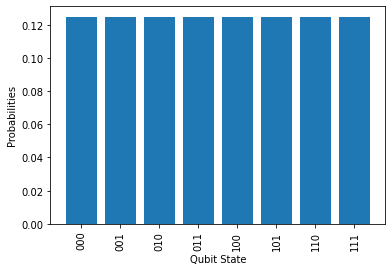

In [7]:
N = 3  # 设置量子比特数
   
# 初始化量子电路
cir = UAnsatz(N)

# 给每一个量子比特施加哈达玛门 H
cir.superposition_layer()

# 制备输出态
# 如果用户不输入初始量子态，默认初始为|00..0>
final_state = cir.run_state_vector()

# 获取概率分布的理论值，令 shots = 0
res = cir.measure(shots = 0, plot = True)

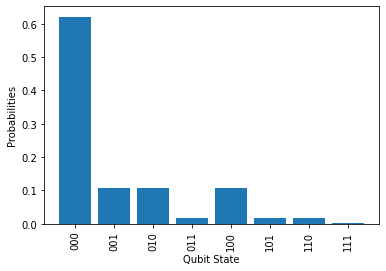

In [8]:
N = 3  # 设置量子比特数
    
# 初始化量子电路
cir = UAnsatz(N)

# 给每一个量子比特施加 Ry(pi/4)旋转
cir.weak_superposition_layer()

# 制备输出态
# 如果用户不输入初始量子态，默认初始为|00..0>
final_state = cir.run_state_vector()

# 获取概率分布的理论值，令 shots = 0
res = cir.measure(shots = 0, plot = True)

以下是一个使用频率较高的电路模板 `complex_entangled_layer(theta, DEPTH)`，用户可按照电路深度参数 `DEPTH/D` 快速拓展电路。其中涉及的广义旋转门 $U_3$ 的定义为：

$$
U_3(\theta, \phi, \varphi) := 
\begin{bmatrix} 
\cos \frac{\theta}{2} & -e^{i \varphi}\sin \frac{\theta}{2} \\ 
e^{i \phi}\sin \frac{\theta}{2} &e^{i (\phi+\varphi)} \cos \frac{\theta}{2} 
\end{bmatrix},\tag{20}
$$

$U_3$ 旋转门在效果上是等价于以下组合旋转门的,

$$
U_3(\theta, \phi, \varphi) 
= R_z(\phi)*R_y(\theta)*R_z(\varphi)
:=
\begin{bmatrix}
e^{-i\frac{\phi}{2}} & 0 \\ 
0 & e^{i\frac{\phi}{2}}
\end{bmatrix}
\begin{bmatrix}
\cos \frac{\theta}{2} &-\sin \frac{\theta}{2} \\ 
\sin \frac{\theta}{2} &\cos \frac{\theta}{2} 
\end{bmatrix}
\begin{bmatrix}
e^{-i\frac{\varphi}{2}} & 0 \\ 
0 & e^{i\frac{\varphi}{2}}
\end{bmatrix}.\tag{21}
$$

感兴趣的读者不妨自行验证一下。

<img src="figures/intro-fig-complex_entangled_layer2-cn.png" width="850" >

特别地，当我们处理的任务不涉及虚数时，使用电路模板 `real_entangled_layer(theta, DEPTH)` 会更加高效 ($R_y$旋转门替代$U_3$)。

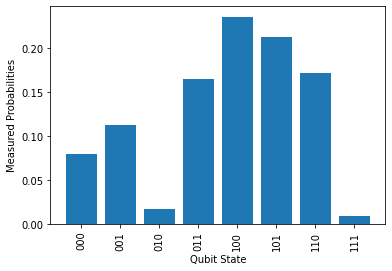

In [9]:
N = 4            # 设置量子比特数
DEPTH = 6        # 设置量子电路深度
theta = np.random.randn(DEPTH, N, 3)
    
# 我们需要将 Numpy array 转换成 Paddle 中的 Tensor
theta = paddle.to_tensor(theta)

# 初始化量子电路
cir = UAnsatz(N)

# 添加深度为 D = 6 的复数强纠缠结构QNN {Rz+Ry+Rz/U3 + CNOT's}
cir.complex_entangled_layer(theta, DEPTH)

# 制备输出态
# 如果用户不输入初始量子态，默认初始为|00..0>
final_state = cir.run_state_vector()

# 测量输出态的[0，1，2]号量子比特2048次，统计测量结果的频率
res = cir.measure(shots = 2048, which_qubits = [0, 1, 2], plot = True)

<p>[回到 <a href="#Contents">目录</a>]</p>

<hr>

## <a name="Mode"> 量桨的运行模式说明</a>

###  <a name="vec"> 波函数向量模式 </a>

所谓的波函数模式也就是用复数向量表示和储存量子态。向量模式只能处理纯态，但这种模式在家用电脑硬件高效支持**20+量子比特**的运算。用户可以测试下自己电脑的极限在哪里。在这种表示下，量子门 (酉矩阵)作用在量子比特 (一个复向量)上本质上的运算是**矩阵乘以向量**：

$$\lvert {\psi}\rangle = U \lvert {\psi_0}\rangle. \tag{22}$$

代码中，具体体现在 UAnsatz的调用 `cir.run_state_vector(input_state = None)`。如果我们不输入任何初始量子态，就会默认所有的量子比特都处于$\lvert {0}\rangle$态。接着来看个具体的例子：

In [10]:
from paddle_quantum.state import vec, vec_random

N = 20           # 设置量子比特数
DEPTH = 6        # 设置量子电路深度
theta = np.random.randn(DEPTH, N, 1)

# 调用内置的 |00..0> 初始态
initial_state1 = vec(N)
# 调用内置的随机量子态 |psi>
initial_state2 = vec_random(N)
    
# 我们需要将 Numpy array 转换成 Paddle 中的 Tensor
theta = paddle.to_tensor(theta)
initial_state = paddle.to_tensor(initial_state1)

# 初始化量子电路
cir = UAnsatz(N)

# 添加深度为 Depth 的实数强纠缠结构QNN {Ry+CNOT's}
cir.real_entangled_layer(theta, DEPTH)

# 制备输出态
# 如果用户不输入初始量子态，默认初始为|00..0>
final_state = cir.run_state_vector(initial_state)
print(final_state.numpy())

[[ 0.00034024+0.j -0.00015082+0.j  0.00038722+0.j ... -0.00041021+0.j
  -0.00070034+0.j -0.00021523+0.j]]


###  <a name="density"> 密度矩阵模式 </a>

同时 Paddle quantum也支持了密度矩阵运算模式，也就是用一个密度矩阵 $\rho = \sum_i P_i \lvert {\psi_i}\rangle\langle{\psi_i} \lvert$表示和储存量子态。该模式下可以根据算法需要支持**混合态模拟**。但是在密度矩阵模式下，家用电脑硬件只能运行10个左右的量子比特。请用户注意这方面的限制，我们也在不断优化这个模式下的模拟器性能。在这种表示下，量子门 (酉矩阵)作用在量子态(一个迹为1的厄尔米特矩阵)上本质上的运算是**矩阵乘法**：

$$\rho = U \rho_0 U^\dagger. \tag{23}$$

代码中，具体体现在 UAnsatz的调用 `cir.run_density_matrix()`。接着来看个具体的例子：

In [11]:
from paddle_quantum.state import density_op, density_op_random, completely_mixed_computational

N = 2            # 设置量子比特数
DEPTH = 6        # 设置量子电路深度
theta = np.random.randn(DEPTH, N, 1)

# 调用内置的 |00..0><00..0| 初始态
initial_state1 = density_op(N)
# 调用内置的随机量子态, 可以指定是否允许复数元素和矩阵秩 
initial_state2 = density_op_random(N, real_or_complex=2, rank=4)
# 调用内置的计算基下的完全混合态 
initial_state3 = completely_mixed_computational(N)
    
# 我们需要将 Numpy array 转换成 Paddle 中的 Tensor
theta = paddle.to_tensor(theta)
initial_state = paddle.to_tensor(initial_state1)

# 初始化量子电路
cir = UAnsatz(N)

# 添加深度为 Depth 的实数强纠缠结构QNN {Ry+CNOT's}
cir.real_entangled_layer(theta, DEPTH)

# 制备输出态
# 如果用户不输入初始量子态，默认初始为|00..0><00..0|
final_state = cir.run_density_matrix(initial_state)
print(final_state.numpy())

[[ 0.04269908+0.j  0.01452372+0.j  0.15539789+0.j -0.12851626+0.j]
 [ 0.01452372+0.j  0.00494012+0.j  0.05285723+0.j -0.04371368+0.j]
 [ 0.15539789+0.j  0.05285723+0.j  0.56555089+0.j -0.4677186 +0.j]
 [-0.12851626+0.j -0.04371368+0.j -0.4677186 +0.j  0.38680991+0.j]]


如果你对源代码有兴趣，可以利用如下 magic command即时查看。或者关注我们的 [[Github]](https://github.com/PaddlePaddle/Quantum)！

###  <a name="Bell">练习：如何从计算基制备贝尔态</a>

贝尔态是一种很常用的量子纠缠态， 可以表示为

$$
\lvert {\Phi^+}\rangle = \frac{1}{\sqrt{2}} \big(\lvert {00}\rangle + \lvert {11}\rangle\big)
= \frac{1}{\sqrt{2}} \,
\begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix}.\tag{24}
$$

那么我们如何用量桨来制备一个贝尔态呢? 只需要如下的量子电路：


<img src="figures/intro-fig-bell2.png" width="750" >

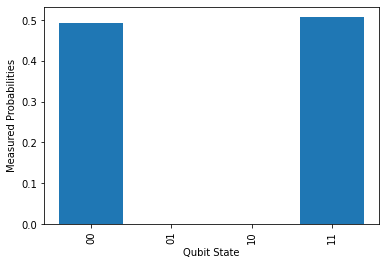

我们制备出的贝尔态是:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [12]:
# 初始化量子电路
cir = UAnsatz(2)

# 添加量子门
cir.h(0)
cir.cnot([0, 1])  

# 制备输出态
# 如果用户不输入初始量子态，默认初始为|00..0>
output_state = cir.run_state_vector()

# 我们测量输出态2048次，获得测量结果频率分布
# 如果用户想获取概率分布的理论值，可以令 shots = 0
cir.measure(shots = 2048, plot = True)

print('我们制备出的贝尔态是:')
print(output_state.numpy())

<p>[回到 <a href="#Contents">目录</a>]</p>

<hr>

## <a name="Op"> 飞桨 Paddlepaddle 优化器使用教程</a>

### <a name="GD"> 示例: 利用飞桨的梯度下降来优化多元函数</a>


在这一节，我们学习如何用飞桨中的优化器找到一个多元函数的极小值

$$
\mathcal{L}(\theta_1, \theta_2, \theta_3)
= (\theta_1)^2 + (\theta_2)^2 + (\theta_3)^2 + 10 \tag{25}
$$

可以看出，只有当 $\theta_1 = \theta_2 = \theta_3 = 0$ 的时候，$\mathcal{L}$ 取最小值10。


In [13]:
# 超参数设置
theta_size = 3 
ITR = 200       # 设置迭代次数
LR = 0.5        # 设置学习速率
SEED = 1        # 固定随机数种子
paddle.seed(SEED)

class Optimization_ex1(paddle.nn.Layer):
    
    def __init__(self, shape, dtype='float64'):
        super(Optimization_ex1, self).__init__()
        
        # 初始化一个长度为 theta_size的可学习参数列表，并用 [-5, 5] 的均匀分布来填充初始值
        self.theta = self.create_parameter(shape=shape, 
                                           default_initializer=paddle.nn.initializer.Uniform(low=-5., high=5.), 
                                           dtype=dtype, is_bias=False)

    # 定义损失函数和前向传播机制
    def forward(self):
        loss = self.theta[0] ** 2 +  self.theta[1] ** 2 + self.theta[2] ** 2 + 10
        return loss
    
# 记录中间优化结果
loss_list = []
parameter_list = []
    
# 定义网络维度
myLayer = Optimization_ex1([theta_size])

# 一般来说，我们利用Adam优化器来获得相对好的收敛，当然你可以改成SGD或者是RMSprop.
opt = paddle.optimizer.Adam(learning_rate = LR, parameters = myLayer.parameters())    

# 优化循环
for itr in range(ITR):

    # 向前传播计算损失函数
    loss = myLayer()[0]

    # 反向传播优化损失函数
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()

    # 记录学习曲线
    loss_list.append(loss.numpy()[0])
    parameter_list.append(myLayer.parameters()[0].numpy())

print('损失函数的最小值是: ', loss_list[-1])

损失函数的最小值是:  10.000000010745854



### <a name="ex2"> 练习: 特征值寻找</a>

接下来，我们试一个更复杂的损失函数。 首先我们介绍一个随机的埃尔米特矩阵 $H$ 其**特征值**为矩阵 $D$ 的对角元素。 

$$ D = \begin{bmatrix} 0.2 &0 \\ 0 &0.8 \end{bmatrix}, \tag{26}  $$

不用担心，我们会帮你生成这个埃尔米特矩阵$H$. 

然后我们初始化参数向量$\boldsymbol{\theta}$，构造出一个简单的线性运算 $U(\boldsymbol{\theta}) = R_z(\theta_1)*R_y(\theta_2)*R_z(\theta_3)$


$$ 
U(\theta_1, \theta_2, \theta_3) = 
\begin{bmatrix}
e^{-i\frac{\theta_1}{2}} & 0 \\ 
0 & e^{i\frac{\theta_1}{2}}
\end{bmatrix}
\begin{bmatrix}
\cos \frac{\theta_2}{2} &-\sin \frac{\theta_2}{2} \\ 
\sin \frac{\theta_2}{2} &\cos \frac{\theta_2}{2} 
\end{bmatrix}
\begin{bmatrix}
e^{-i\frac{\theta_3}{2}} & 0 \\ 
0 & e^{i\frac{\theta_3}{2}}
\end{bmatrix}, \tag{27}
$$

我们让这个矩阵（模板）乘以 $\lvert {0}\rangle$，得到一个新的2维复向量$\lvert {\phi}\rangle$


$$ 
\lvert {\phi}\rangle = U(\theta_1, \theta_2, \theta_3)\lvert {0}\rangle, \tag{28}
$$

然后，我们定义损失函数为：

$$
\mathcal{L}(\theta_1, \theta_2, \theta_3) 
= \langle{\phi} \lvert H \lvert {\phi}\rangle 
=  \langle{0} \lvert  U^{\dagger}H U \lvert {0}\rangle. \tag{29}
$$

来看看优化后我们得到了什么！

In [14]:
from scipy.stats import unitary_group

# V 是一个 2x2 的随机酉矩阵
V = unitary_group.rvs(2)

# D 的对角元是H的特征值
# 你可以任意改变这里的对角元数值
D = np.diag([0.2, 0.8])

# V_dagger 是 V 的埃尔米特转置
V_dagger = V.conj().T

# @：代表矩阵乘积运算
H = (V @ D @ V_dagger)
print('随机生成的矩阵 H 是:')
print(H, '\n')
print('不出所料，H 的特征值是:')
print(np.linalg.eigh(H)[0])

随机生成的矩阵 H 是:
[[ 0.63841338-6.93889390e-18j -0.13697062-2.28212151e-01j]
 [-0.13697062+2.28212151e-01j  0.36158662+0.00000000e+00j]] 

不出所料，H 的特征值是:
[0.2 0.8]


In [15]:
# 超参数设置
theta_size = 3    # 设置 theta 维度
num_qubits = 1    # 设置量子比特数
ITR = 50          # 设置迭代次数
LR = 0.5          # 设置学习速率
SEED = 1          # 固定theta参数的随机数种子
paddle.seed(SEED)

# 单独设置电路模块
def U_theta(theta):
    
    # 初始化电路然后添加量子门
    cir = UAnsatz(num_qubits)
    cir.rz(theta[0], 0)
    cir.ry(theta[1], 0)
    cir.rz(theta[2], 0)
    
    # 返回参数化矩阵
    return cir.U

In [16]:
class Optimization_ex2(paddle.nn.Layer):
    
    def __init__(self, shape, dtype='float64'):
        super(Optimization_ex2, self).__init__()
        
        # 初始化一个长度为 theta_size的可学习参数列表，并用 [0, 2*pi] 的均匀分布来填充初始值
        self.theta = self.create_parameter(shape=shape, 
                                           default_initializer=paddle.nn.initializer.Uniform(low=0., high=2*np.pi), 
                                           dtype=dtype, is_bias=False)
        self.H = paddle.to_tensor(H)
        
    # 定义损失函数和前向传播机制
    def forward(self):
        
        # 获取量子神经网络的酉矩阵表示
        U = U_theta(self.theta)
        
        # 埃尔米特转置运算
        U_dagger = dagger(U)
        
        # 计算损失函数函数
        loss = paddle.real(matmul(U_dagger, matmul(self.H, U)))[0][0]
        
        return loss

In [17]:
loss_list = []
parameter_list = []
    
myLayer = Optimization_ex2([theta_size])

# 这里采用 SGD 优化器
opt = paddle.optimizer.SGD(learning_rate = LR, parameters = myLayer.parameters())    

# 优化循环
for itr in range(ITR):

    # 前向传播计算损失函数
    loss = myLayer()[0]

    # 反向传播极小化损失函数
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()

    # 记录学习曲线
    loss_list.append(loss.numpy()[0])
    parameter_list.append(myLayer.parameters()[0].numpy())
    if itr % 5 == 0:
        print('iter:', itr, '  loss: %.4f' % loss.numpy())

print('损失函数的最小值是: ', loss_list[-1])

iter: 0   loss: 0.6550
iter: 5   loss: 0.4527
iter: 10   loss: 0.2951
iter: 15   loss: 0.2330
iter: 20   loss: 0.2108
iter: 25   loss: 0.2033
iter: 30   loss: 0.2010
iter: 35   loss: 0.2003
iter: 40   loss: 0.2001
iter: 45   loss: 0.2000
损失函数的最小值是:  0.20000807961972783


我们可以改变一下$H$的特征值。如果将它对角化后的的对角矩阵改变为

$$ D = \begin{bmatrix} 0.8 &0 \\ 0 &1.2 \end{bmatrix}. \tag{30}  $$

你会发现我们仍然得到了$H$的最小特征值0.8, 你能找到背后的原因吗？还是说这背后隐藏着什么理论？


<p>[回到 <a href="#Contents">目录</a>]</p>

<hr>

## <a name="demo">量子机器学习案例</a>

### <a name="VQE"> 变分量子特征求解器 (VQE) -- 无监督学习</a>

目前阶段，大规模的可容错的量子计算机还未实现。我们目前只能造出有噪音的，中等规模量子计算系统（NISQ）。现在一个利用 NISQ 的量子设备很有前景的算法种类就是量子-经典混合算法。人们期望这套方法也许可以在某些应用中超越经典计算机的表现。变分量子特征求解器（VQE）就是里面的一个重要应用。它利用参数化的电路搜寻广阔的希尔伯特空间，并利用经典机器学习中的梯度下降来找到最优参数，并接近一个哈密顿量的基态（也就是找到一个埃尔米特矩阵的最小特征值）。为了确保你能理解, 我们来一起过一遍以下两量子比特 (2-qubit)的例子。

假设我们想找到如下哈密顿量的基态：

$$ H = 0.4 \, Z \otimes I + 0.4 \, I \otimes Z + 0.2 \, X \otimes X. \tag{31}$$

给定一种常见的量子神经网络架构

<img src="figures/intro-fig-vqeAnsatz.png" width="450" >

我们已经学会如何建造这个电路了。如果你忘了, 请转到 <a href="#QNN">这里</a>。

In [18]:
from paddle_quantum.utils import pauli_str_to_matrix

# 首先生成泡利字符串表示下的哈密顿量
# 相当于0.4*kron(I, Z) + 0.4*kron(Z, I) + 0.2*kron(X, X)
# 其中， X，Y, Z是泡利矩阵， I是单位矩阵
H_info = [[0.4, 'z0'], [0.4, 'z1'], [0.2, 'x0,x1']]

# 超参数设置
num_qubits = 2
theta_size = 4
ITR = 60
LR = 0.4
SEED = 999       

# 把记录的关于哈密顿量的信息转化为矩阵表示
H_matrix = pauli_str_to_matrix(H_info, num_qubits)

In [19]:
class vqe_demo(paddle.nn.Layer):
    
    def __init__(self, shape, dtype='float64'):
        super(vqe_demo, self).__init__()
        
        # 初始化一个长度为theta_size的可学习参数列表，并用[0, 2*pi]的均匀分布来填充初始值
        self.theta = self.create_parameter(shape=shape, 
                                           default_initializer=paddle.nn.initializer.Uniform(low=0., high=2*np.pi), 
                                           dtype=dtype, is_bias=False)
        
    # 定义损失函数和前向传播机制
    def forward(self):
        
        # 初始量子电路
        cir = UAnsatz(num_qubits)
        
        # 添加量子门
        cir.ry(self.theta[0], 0)
        cir.ry(self.theta[1], 1)
        cir.cnot([0, 1])
        cir.ry(self.theta[2], 0)
        cir.ry(self.theta[3], 1)
        
        # 选择用量子态的向量表示
        cir.run_state_vector()
        
        # 计算当前量子态下关于观测量H_info的期望值
        # 也就是 <psi|H|psi>
        loss = cir.expecval(H_info)
        
        return loss

In [20]:
loss_list = []
parameter_list = []

# 定义网络维度
vqe = vqe_demo([theta_size])

# 一般来说，我们利用Adam优化器来获得相对好的收敛，当然你可以改成SGD或者是RMS prop.
opt = paddle.optimizer.Adam(learning_rate = LR, parameters = vqe.parameters())    

# 优化循环
for itr in range(ITR):

    # 前向传播计算损失函数
    loss = vqe()

    # 反向传播极小化损失函数
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()

    # 记录学习曲线
    loss_list.append(loss.numpy()[0])
    parameter_list.append(vqe.parameters()[0].numpy())
    if itr % 10 == 0:
        print('iter:', itr, '  loss: %.4f' % loss.numpy())


print('计算得到的基态能量是: ', loss_list[-1])
print('真实的基态能量为: ', np.linalg.eigh(H_matrix)[0][0])

iter: 0   loss: 0.7363
iter: 10   loss: -0.5727
iter: 20   loss: -0.7474
iter: 30   loss: -0.8101
iter: 40   loss: -0.8154
iter: 50   loss: -0.8225
计算得到的基态能量是:  -0.824229008050201
真实的基态能量为:  -0.8246211251235321


<p>[回到 <a href="#Contents">目录</a>]</p>

<hr>

## <a name="References">参考文献</a>

[1] Nielsen, M. A. & Chuang, I. L. Quantum computation and quantum information. (Cambridge university press, 2010).

[2] Phillip Kaye, Laflamme, R. & Mosca, M. An Introduction to Quantum Computing. (2007).

[3] Biamonte, J. et al. Quantum machine learning. [Nature 549, 195–202 (2017).](https://www.nature.com/articles/nature23474)

[4] Schuld, M., Sinayskiy, I. & Petruccione, F. An introduction to quantum machine learning. [Contemp. Phys. 56, 172–185 (2015).](https://www.tandfonline.com/doi/abs/10.1080/00107514.2014.964942)

[5] Benedetti, M., Lloyd, E., Sack, S. & Fiorentini, M. Parameterized quantum circuits as machine learning models. [Quantum Sci. Technol. 4, 043001 (2019).](https://iopscience.iop.org/article/10.1088/2058-9565/ab4eb5)

[6] [Peruzzo, A. et al. A variational eigenvalue solver on a photonic quantum processor. Nat. Commun. 5, 4213 (2014).](https://www.nature.com/articles/ncomms5213)

[7] [McClean, J. R., Romero, J., Babbush, R. & Aspuru-Guzik, A. The theory of variational hybrid quantum-classical algorithms. New J. Phys. 18, 023023 (2016).](https://iopscience.iop.org/article/10.1088/1367-2630/18/2/023023)

[8] [Kandala, A. et al. Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets. Nature 549, 242–246 (2017).](https://www.nature.com/articles/nature23879)

[9] [Mitarai, K., Negoro, M., Kitagawa, M. & Fujii, K. Quantum circuit learning. Phys. Rev. A 98, 032309 (2018).](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.032309)

<p>[回到 <a href="#Contents">目录</a>]</p>

<hr>